# Final Project Submission

Please fill out:
* Student name: Joey Husney
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL: https://jhusney1.github.io/why_is_multicollinearity_a_problem_for_linear_regression


## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

Using the King County House Sales dataset, we will *predict* the sale price of houses as accurately as possible based on all the values we are given. We will be using the OSEMN process to clean, normalize, and model the data. Below are the column descriptions:

## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# OBTAIN

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm  
pd.options.display.max_columns = 100

plt.style.use('seaborn-poster')
plt.rcParams['figure.figsize'] = (20,15)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
kings_df = pd.read_csv('kc_house_data.csv', index_col='id')
kings_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kings_df.shape

(21597, 20)

In [5]:
kings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


In [6]:
kings_df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

## Observations
* May want to convert date column to date datatype
* sqr foot basement should probably be a float instead of string
* Get rid of null values
* Separate categorical and continuous columns

# SCRUB

### Modify necessary datatypes

In [7]:
kings_df['date'] = pd.to_datetime(kings_df['date']) 

In [8]:
kings_df['date']

id
7129300520   2014-10-13
6414100192   2014-12-09
5631500400   2015-02-25
2487200875   2014-12-09
1954400510   2015-02-18
                ...    
263000018    2014-05-21
6600060120   2015-02-23
1523300141   2014-06-23
291310100    2015-01-16
1523300157   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

### Check for NULL values

In [9]:
kings_df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Deal with null values

In [10]:
kings_df['waterfront'].head()

id
7129300520    NaN
6414100192    0.0
5631500400    0.0
2487200875    0.0
1954400510    0.0
Name: waterfront, dtype: float64

In [11]:
kings_df['waterfront'].value_counts(normalize=True, dropna=False)
# consider not dropping - adds to home value - maybe ohc

0.0    0.883225
NaN    0.110015
1.0    0.006760
Name: waterfront, dtype: float64

In [12]:
# Goind to drop this column because it's messy and doesn't add much value to overall goal
kings_df.drop(columns='waterfront', inplace=True)

In [13]:
kings_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [14]:
kings_df['view'].value_counts(normalize=True, dropna=False)

0.0    0.899292
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
NaN    0.002917
Name: view, dtype: float64

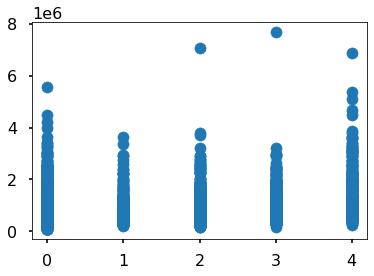

In [15]:
fig, ax = plt.subplots()
ax.scatter(kings_df['view'], kings_df['price'])

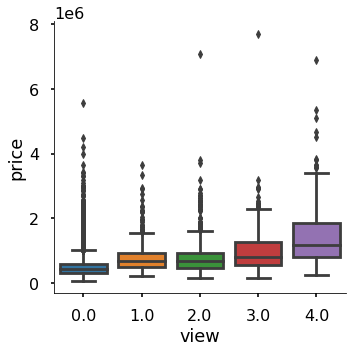

In [16]:
sns.catplot(data=kings_df, x='view', y='price', kind='box')

> For simplicity sake and to get rid of null values, we will create boolean values based on whether or not the house has been viewed

In [17]:
def convert_to_bool(x):
    if x > 0:
        x = 1
    else:
        x = 0
    return x

In [18]:
kings_df['view'] = kings_df['view'].map(convert_to_bool)
kings_df['view'].value_counts(normalize=True, dropna=False)

0    0.902209
1    0.097791
Name: view, dtype: float64

In [19]:
kings_df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [20]:
kings_df['yr_renovated'].value_counts(normalize=True, dropna=False)

0.0       0.787656
NaN       0.177895
2014.0    0.003380
2003.0    0.001435
2013.0    0.001435
            ...   
1944.0    0.000046
1948.0    0.000046
1976.0    0.000046
1934.0    0.000046
1953.0    0.000046
Name: yr_renovated, Length: 71, dtype: float64

> Because 78% of these houses were not renovated, we will make this column into a 0 and 1's column based on whether each particular house was renovated or not

In [21]:
kings_df['yr_renovated'] = kings_df['yr_renovated'].map(convert_to_bool)

In [22]:
kings_df['yr_renovated'].value_counts(normalize=True, dropna=False)

0    0.965551
1    0.034449
Name: yr_renovated, dtype: float64

In [23]:
kings_df.rename(columns={'yr_renovated': 'renovated'}, inplace=True)
kings_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400.0,1951,1,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007


In [24]:
kings_df['renovated'].value_counts(normalize=True, dropna=False)

0    0.965551
1    0.034449
Name: renovated, dtype: float64

In [25]:
kings_df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

> We now got rid of all known null values!

In [26]:
kings_df['yr_built'].value_counts(normalize=True, dropna=False)

2014    0.025883
2006    0.020975
2005    0.020836
2004    0.020049
2003    0.019447
          ...   
1933    0.001389
1901    0.001343
1902    0.001250
1935    0.001111
1934    0.000972
Name: yr_built, Length: 116, dtype: float64

> Convert sqft_basement from String to Float data type

In [27]:
kings_df['sqft_basement'] = pd.to_numeric(kings_df['sqft_basement'], errors='coerce')
kings_df['sqft_basement']

id
7129300520      0.0
6414100192    400.0
5631500400      0.0
2487200875    910.0
1954400510      0.0
              ...  
263000018       0.0
6600060120      0.0
1523300141      0.0
291310100       0.0
1523300157      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [28]:
kings_df['sqft_basement'].value_counts(normalize=True, dropna=False)

0.0       0.593879
NaN       0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
588.0     0.000046
1920.0    0.000046
2390.0    0.000046
1245.0    0.000046
1135.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

> Something must be done about these newly discovered null values. It seems that this should be made into a boolean columns whether or not the houses contain a view for the same reason as sqftbasement

In [29]:
kings_df['view'] = kings_df['view'].map(convert_to_bool)
kings_df['view'].value_counts(normalize=True, dropna=False)

0    0.902209
1    0.097791
Name: view, dtype: float64

### Question 2: Is there any multicollinearity occuring between different columns therby skewing the model for sale price?

In [30]:
def check_multicol(df):
    
    corr = df.corr().abs()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0, annot=True)

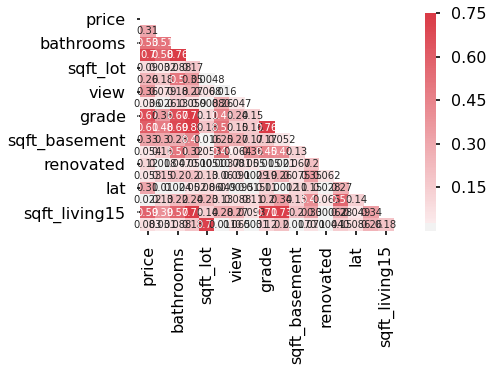

In [31]:
check_multicol(kings_df)

In [32]:
sqft_sample = kings_df[kings_df['sqft_basement'] > 0].sample(5, random_state=15)
sqft_sample[['sqft_above', 'sqft_living', 'sqft_basement']]
# telling us to drop sqft_living - no added value

,sqft_above,sqft_living,sqft_basement
id,,,
1934800087,1080,1370,290.0
2051200436,2242,3490,1248.0
9250900104,1100,2110,1010.0
1189000492,1140,1405,265.0
3223059123,1500,2750,1250.0


### Answer 2: Multicollinearity found in following combinations:
* sqft_above and sqft_living
* sqft_living and bathrooms
* grade and sqft_living
* sqft_above and sqft_living
* sqft_above and grade
* sqft_living15 and sqft_living
* sqft_living15 and sqft_above
* sqft_living15 and grade
* sqft_lot15 and sqft_lot

> Remove sqft_living, can recalculate based on other columns

In [33]:
kings_df.drop(['sqft_living'], inplace=True, axis=1)
kings_df.head()

,date,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,5650,1.0,0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,7242,2.0,0,3,7,2170,400.0,1951,1,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,10000,1.0,0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,5000,1.0,0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,8080,1.0,0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


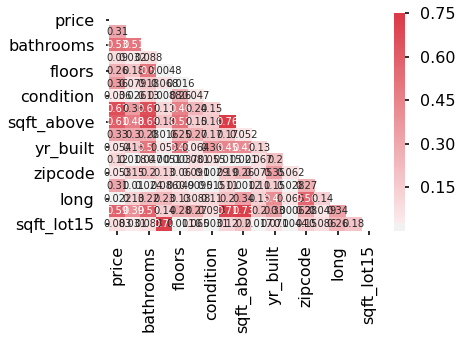

In [34]:
check_multicol(kings_df)

In [60]:
#!pip install -U matplotlib
import matplotlib
matplotlib.__version__

'3.3.2'

> Drop some other columns that aren't so important in the bigger scheme of things

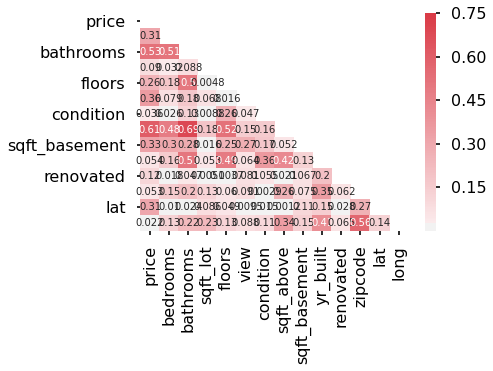

In [36]:
kings_df.drop(['sqft_living15'], inplace=True, axis=1)
kings_df.drop(['sqft_lot15'], inplace=True, axis=1)
kings_df.drop(['grade'], inplace=True, axis=1)
check_multicol(kings_df)

# EXPLORE

### Identify outliers

<AxesSubplot:xlabel='price'>

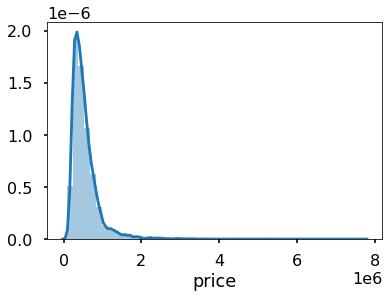

In [37]:
target = 'price'
sns.distplot(kings_df[target])

<AxesSubplot:xlabel='price'>

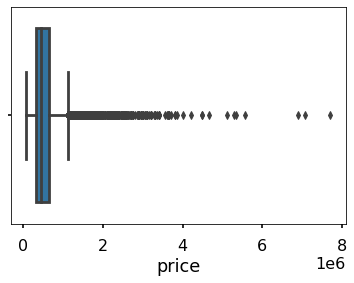

In [38]:
sns.boxplot(kings_df[target])

> We see clearly from both the histogram and the whisker plot that there are many outliers for price column

### Remove outliers

In [39]:
import scipy
z_price = scipy.stats.zscore(kings_df['price'])
z_price = np.abs(z_price)
z_price

array([0.86671627, 0.00625157, 0.98077344, ..., 0.37618606, 0.38190525,
       0.58606486])

<AxesSubplot:xlabel='price'>

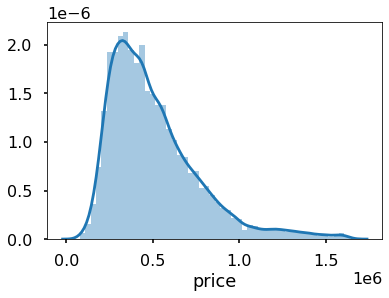

In [40]:
# Preview histogram before changing
sns.distplot(kings_df[z_price < 3]['price'])

In [41]:
# Make changes
kings_df = kings_df[z_price < 3]
kings_df.shape

# Maybe go back and remove more outliers from other cols based on modelling

(21191, 15)

<AxesSubplot:xlabel='price'>

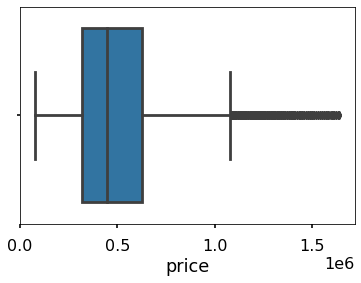

In [42]:
sns.boxplot(kings_df[target])

### Make sure data is accurate

In [43]:
kings_df.describe().round(2)

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long
count,21191.00,21191.00,21191.00,21191.00,21191.00,21191.00,21191.00,21191.00,20742.00,21191.00,21191.00,21191.00,21191.00,21191.00
mean,507010.29,3.36,2.09,14826.73,1.49,0.09,3.41,1751.50,281.00,1970.93,0.03,98078.29,47.56,-122.21
std,259462.21,0.92,0.74,40400.95,0.54,0.28,0.65,772.21,425.17,29.29,0.18,53.41,0.14,0.14
min,78000.00,1.00,0.50,520.00,1.00,0.00,1.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52
25%,320000.00,3.00,1.50,5005.50,1.00,0.00,3.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33
50%,447000.00,3.00,2.25,7560.00,1.00,0.00,3.00,1544.00,0.00,1975.00,0.00,98065.00,47.57,-122.23
75%,627650.00,4.00,2.50,10490.50,2.00,0.00,4.00,2170.00,540.00,1996.00,0.00,98118.00,47.68,-122.12
max,1640000.00,33.00,7.50,1651359.00,3.50,1.00,5.00,7320.00,2850.00,2015.00,1.00,98199.00,47.78,-121.32


### Question 2: Which columns should be divided into the categorical section?

In [44]:
# Create scatter matrix to see if any numerical categorical values
pd.plotting.scatter_matrix(kings_df, figsize=(18,20));

C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Joey\anaconda3

Error in callback <function flush_figures at 0x000001D2ECAD7048> (for post_execute):
Traceback (most recent call last):
  File "C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\IPython\core\events.py", line 88, in trigger
    func(*args, **kwargs)
  File "C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\ipykernel\pylab\backend_inline.py", line 117, in flush_figures
    return show(True)
  File "C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\ipykernel\pylab\backend_inline.py", line 39, in show
    metadata=_fetch_figure_metadata(figure_manager.canvas.figure)
  File "C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\IPython\core\display.py", line 306, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\IPython\core\formatters.py", line 180, in format
    data = formatter(obj)
  File "<C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\decorator.py:decora

KeyboardInterrupt: 

### Answer 3: Zip code

In [45]:
cat_cols = ['zipcode']
kings_df = pd.get_dummies(data=kings_df, columns= cat_cols, drop_first=True)
kings_df

,date,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,renovated,lat,long,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,5650,1.0,0,3,1180,0.0,1955,0,47.5112,-122.257,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6414100192,2014-12-09,538000.0,3,2.25,7242,2.0,0,3,2170,400.0,1951,1,47.7210,-122.319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5631500400,2015-02-25,180000.0,2,1.00,10000,1.0,0,3,770,0.0,1933,0,47.7379,-122.233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2487200875,2014-12-09,604000.0,4,3.00,5000,1.0,0,5,1050,910.0,1965,0,47.5208,-122.393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1954400510,2015-02-18,510000.0,3,2.00,8080,1.0,0,3,1680,0.0,1987,0,47.6168,-122.045,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1131,3.0,0,3,1530,0.0,2009,0,47.6993,-122.346,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6600060120,2015-02-23,400000.0,4,2.50,5813,2.0,0,3,2310,0.0,2014,0,47.5107,-122.362,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1523300141,2014-06-23,402101.0,2,0.75,1350,2.0,0,3,1020,0.0,2009,0,47.5944,-122.299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# MODEL

In [46]:
# Used instructors notebook as reference for this piece of code
def create_model(df_ohe_, target='price',drop_cols=[]):

    df_ohe = df_ohe_.copy()
    
    ## Removing Cols
    for col in drop_cols:
        if col in df_ohe.columns:
            df_ohe.drop(columns=col,inplace=True)
        
    df_ohe.drop(columns='date', inplace=True)
    features = '+'.join(df_ohe.drop(columns=target).columns)
    formula = target + '~'+features

    model = ols(formula, df_ohe).fit()
    return model

In [47]:
outcome = 'price'
x_cols = list(kings_df.drop(['price', 'date'], axis=1).columns)
x_cols

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'renovated',
 'lat',
 'long',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'z

In [48]:
from statsmodels.formula.api import ols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
formula

'price~bedrooms+bathrooms+sqft_lot+floors+view+condition+sqft_above+sqft_basement+yr_built+renovated+lat+long+zipcode_98002+zipcode_98003+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98126+zipcode_98133+zipcode_98136+zipcode_98144+zipcode_98146+zipcode_98148+zipcode_98155+zipcode_98166+zipcode_

In [49]:
model = ols(formula=formula, data=kings_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1067.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:26:09   Log-Likelihood:            -2.7095e+05
No. Observations:               20742   AIC:                         5.421e+05
Df Residuals:                   20660   BIC:                         5.427e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.306e+07   4.46e+06     -5.173      0.000   -3.18e+07   -1.43e+07
bedrooms      -1.773e+04   1119.074    -15.847      0.000   -1.99e+04   -1.55e+04
bathrooms      2.091e+04   1933.972     10.811      0.000    1.71e+04    2.47e+04
sqft_lot          0.2685      0.022     12.446      0.000       0.226       0.311
floors         -2.24e+04   2311.763     -9.688      0.000   -2.69e+04   -1.79e+04
view           1.306e+05   3045.911     42.865      0.000    1.25e+05    1.37e+05
condition      2.399e+04   1393.367     17.218      0.000    2.13e+04    2.67e+04
sqft_above      201.0717      1.776    113.195      0.000     197.590     204.553
sqft_basement   118.8577      2.549     46.630      0.000     113.862     123.854
yr_built        -43.3412     44.938     -0.964      0.335    -131.424      44.742
renovated      4.814e+04   4731.124     10.175      0.000    3.89e+04    5.74e+04
lat            1.705e+05   4.58e+04      3.720      0.000    8.07e+04     2.6e+05
long          -1.223e+05   3.31e+04     -3.696      0.000   -1.87e+05   -5.74e+04
zipcode_98002  5556.9751   1.03e+04      0.537      0.591   -1.47e+04    2.58e+04
zipcode_98003 -3062.6896   9303.399     -0.329      0.742   -2.13e+04    1.52e+04
zipcode_98004  6.122e+05   1.73e+04     35.380      0.000    5.78e+05    6.46e+05
zipcode_98005  3.316e+05   1.81e+04     18.316      0.000    2.96e+05    3.67e+05
zipcode_98006  3.007e+05   1.48e+04     20.250      0.000    2.72e+05     3.3e+05
zipcode_98007  2.546e+05   1.87e+04     13.634      0.000    2.18e+05    2.91e+05
zipcode_98008  2.357e+05   1.78e+04     13.227      0.000    2.01e+05    2.71e+05
zipcode_98010  9.982e+04   1.59e+04      6.281      0.000    6.87e+04    1.31e+05
zipcode_98011  8.584e+04   2.31e+04      3.713      0.000    4.05e+04    1.31e+05
zipcode_98014  8.513e+04   2.54e+04      3.351      0.001    3.53e+04    1.35e+05
zipcode_98019  5.548e+04   2.51e+04      2.213      0.027    6335.902    1.05e+05
zipcode_98022  3.397e+04   1.39e+04      2.450      0.014    6794.963    6.11e+04
zipcode_98023 -2.031e+04   8561.224     -2.373      0.018   -3.71e+04   -3533.361
zipcode_98024  1.562e+05   2.24e+04      6.963      0.000    1.12e+05       2e+05
zipcode_98027  1.994e+05   1.52e+04     13.085      0.000     1.7e+05    2.29e+05
zipcode_98028  7.381e+04   2.25e+04      3.284      0.001    2.98e+04    1.18e+05
zipcode_98029  2.421e+05   1.74e+04     13.894      0.000    2.08e+05    2.76e+05
zipcode_98030  8149.0208   1.02e+04      0.796      0.426   -1.19e+04    2.82e+04
zipcode_98031  1.357e+04   1.07e+04      1.271      0.204   -7364.219    3.45e+04
zipcode_98032 -2470.6261   1.23e+04     -0.200      0.841   -2.66e+04    2.17e+04
zipcode_98033  3.188e+05   1.93e+04     16.493      0.000    2.81e+05    3.57e+05
zipcode_98034   1.44e+05   2.07e+04      6.964   

In [73]:
model.params.sort_values().tail(40)

zipcode_98010    87256.25746
zipcode_98072   101660.55395
zipcode_98045   105853.77079
zipcode_98034   109547.10960
zipcode_98125   109967.15863
zipcode_98077   110043.78971
zipcode_98118   119697.34354
zipcode_98024   125038.58919
view            130810.02723
zipcode_98126   130924.37501
zipcode_98177   135712.83931
zipcode_98053   164657.61012
zipcode_98027   174666.59116
zipcode_98074   186374.85585
zipcode_98052   198699.68893
zipcode_98136   202496.19907
zipcode_98144   204160.95828
zipcode_98008   206420.73193
zipcode_98029   213396.72193
zipcode_98075   215438.82527
zipcode_98007   226413.74353
zipcode_98117   236644.01795
lat             243273.28569
zipcode_98116   252544.34659
zipcode_98107   252698.68064
zipcode_98115   259234.60762
zipcode_98103   261033.86928
zipcode_98006   276227.55365
zipcode_98033   286631.59847
zipcode_98122   289473.40549
zipcode_98005   304201.40957
zipcode_98199   318397.81713
zipcode_98105   389719.15311
zipcode_98119   408487.39551
zipcode_98102 

High p-values:
- yr_built
- some zipcodes

In [50]:
import statsmodels.api as sm
from scipy import stats

In [51]:
# Copied mostly from James Irvings notebook
def view_model(model,y_true=None):
    
    display(model.summary())
    resids = model.resid
    
    ## Plot
    fig,ax = plt.subplots(ncols=2,figsize=(10,5))
    
    ## QQ PLOT
    sm.graphics.qqplot(resids, stats.distributions.norm,
              fit=True, line='45',ax=ax[0])
    ax[0].set_title('QQ Plot')
    
    
    ## plot to test Homoskedasticity
    xs = np.linspace(0,len(resids),len(resids))
    xlabel = 'Row in Dataset'
    font_dict = dict(rotation = 0)

    ## Plot residuals
    ax[1].scatter(x=xs,y=resids)
    ax[1].axhline(0,color='k',zorder=-1)

    ax[1].set(ylabel='Residuals',title='Homoskedasticity Check',
              xlabel=xlabel)
    
    plt.tight_layout()
    plt.show()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1067.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:26:09   Log-Likelihood:            -2.7095e+05
No. Observations:               20742   AIC:                         5.421e+05
Df Residuals:                   20660   BIC:                         5.427e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.306e+07   4.46e+06     -5.173      0.000   -3.18e+07   -1.43e+07
bedrooms      -1.773e+04   1119.074    -15.847      0.000   -1.99e+04   -1.55e+04
bathrooms      2.091e+04   1933.972     10.811      0.000    1.71e+04    2.47e+04
sqft_lot          0.2685      0.022     12.446      0.000       0.226       0.311
floors         -2.24e+04   2311.763     -9.688      0.000   -2.69e+04   -1.79e+04
view           1.306e+05   3045.911     42.865      0.000    1.25e+05    1.37e+05
condition      2.399e+04   1393.367     17.218      0.000    2.13e+04    2.67e+04
sqft_above      201.0717      1.776    113.195      0.000     197.590     204.553
sqft_basement   118.8577      2.549     46.630      0.000     113.862     123.854
yr_built        -43.3412     44.938     -0.964      0.335    -131.424      44.742
renovated      4.814e+04   4731.124     10.175      0.000    3.89e+04    5.74e+04
lat            1.705e+05   4.58e+04      3.720      0.000    8.07e+04     2.6e+05
long          -1.223e+05   3.31e+04     -3.696      0.000   -1.87e+05   -5.74e+04
zipcode_98002  5556.9751   1.03e+04      0.537      0.591   -1.47e+04    2.58e+04
zipcode_98003 -3062.6896   9303.399     -0.329      0.742   -2.13e+04    1.52e+04
zipcode_98004  6.122e+05   1.73e+04     35.380      0.000    5.78e+05    6.46e+05
zipcode_98005  3.316e+05   1.81e+04     18.316      0.000    2.96e+05    3.67e+05
zipcode_98006  3.007e+05   1.48e+04     20.250      0.000    2.72e+05     3.3e+05
zipcode_98007  2.546e+05   1.87e+04     13.634      0.000    2.18e+05    2.91e+05
zipcode_98008  2.357e+05   1.78e+04     13.227      0.000    2.01e+05    2.71e+05
zipcode_98010  9.982e+04   1.59e+04      6.281      0.000    6.87e+04    1.31e+05
zipcode_98011  8.584e+04   2.31e+04      3.713      0.000    4.05e+04    1.31e+05
zipcode_98014  8.513e+04   2.54e+04      3.351      0.001    3.53e+04    1.35e+05
zipcode_98019  5.548e+04   2.51e+04      2.213      0.027    6335.902    1.05e+05
zipcode_98022  3.397e+04   1.39e+04      2.450      0.014    6794.963    6.11e+04
zipcode_98023 -2.031e+04   8561.224     -2.373      0.018   -3.71e+04   -3533.361
zipcode_98024  1.562e+05   2.24e+04      6.963      0.000    1.12e+05       2e+05
zipcode_98027  1.994e+05   1.52e+04     13.085      0.000     1.7e+05    2.29e+05
zipcode_98028  7.381e+04   2.25e+04      3.284      0.001    2.98e+04    1.18e+05
zipcode_98029  2.421e+05   1.74e+04     13.894      0.000    2.08e+05    2.76e+05
zipcode_98030  8149.0208   1.02e+04      0.796      0.426   -1.19e+04    2.82e+04
zipcode_98031  1.357e+04   1.07e+04      1.271      0.204   -7364.219    3.45e+04
zipcode_98032 -2470.6261   1.23e+04     -0.200      0.841   -2.66e+04    2.17e+04
zipcode_98033  3.188e+05   1.93e+04     16.493      0.000    2.81e+05    3.57e+05
zipcode_98034   1.44e+05   2.07e+04      6.964   

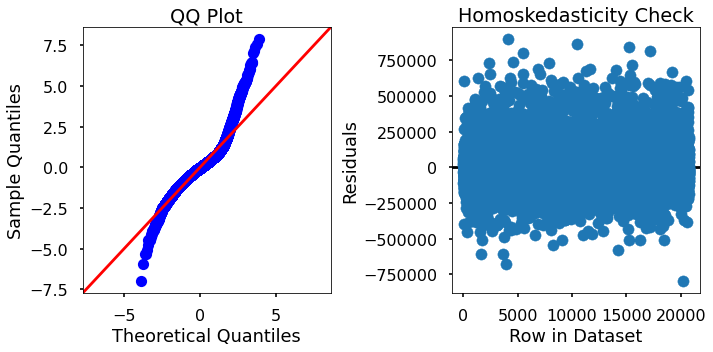

In [52]:
view_model(model)

In [53]:
pvalues = model.pvalues.rename('p-values')
pvalues.sort_values(ascending=False,inplace=True)
pvalues

zipcode_98092     9.919285e-01
zipcode_98032     8.412439e-01
zipcode_98003     7.420070e-01
zipcode_98002     5.910235e-01
zipcode_98030     4.261793e-01
                     ...      
zipcode_98040    4.083635e-223
zipcode_98004    2.977907e-266
sqft_basement     0.000000e+00
sqft_above        0.000000e+00
view              0.000000e+00
Name: p-values, Length: 82, dtype: float64

In [54]:
bad_coeffs = list(pvalues[pvalues > .05].index)
if 'Intercept' in bad_coeffs:
    bad_coeffs.remove('Intercept')
len(bad_coeffs) / len(kings_df.columns)

0.13253012048192772

In [55]:
bad_coeffs[:15]

['zipcode_98092',
 'zipcode_98032',
 'zipcode_98003',
 'zipcode_98002',
 'zipcode_98030',
 'zipcode_98188',
 'zipcode_98198',
 'yr_built',
 'zipcode_98031',
 'zipcode_98168',
 'zipcode_98042']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1234.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:26:10   Log-Likelihood:            -2.7095e+05
No. Observations:               20742   AIC:                         5.420e+05
Df Residuals:                   20671   BIC:                         5.426e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.303e+07   2.84e+06     -8.109      0.000   -2.86e+07   -1.75e+07
bedrooms      -1.758e+04   1109.906    -15.843      0.000   -1.98e+04   -1.54e+04
bathrooms      2.018e+04   1798.341     11.222      0.000    1.67e+04    2.37e+04
sqft_lot          0.2684      0.022     12.482      0.000       0.226       0.311
floors          -2.3e+04   2172.040    -10.587      0.000   -2.73e+04   -1.87e+04
view           1.308e+05   3029.705     43.176      0.000    1.25e+05    1.37e+05
condition      2.452e+04   1319.439     18.585      0.000    2.19e+04    2.71e+04
sqft_above      201.1254      1.765    113.946      0.000     197.666     204.585
sqft_basement   118.8473      2.547     46.670      0.000     113.856     123.839
renovated      4.949e+04   4538.935     10.904      0.000    4.06e+04    5.84e+04
lat            2.433e+05   2.95e+04      8.251      0.000    1.85e+05    3.01e+05
long          -9.324e+04   2.21e+04     -4.213      0.000   -1.37e+05   -4.99e+04
zipcode_98004  5.856e+05   1.08e+04     54.011      0.000    5.64e+05    6.07e+05
zipcode_98005  3.042e+05    1.2e+04     25.404      0.000    2.81e+05    3.28e+05
zipcode_98006  2.762e+05   8539.928     32.345      0.000    2.59e+05    2.93e+05
zipcode_98007  2.264e+05   1.26e+04     17.953      0.000    2.02e+05    2.51e+05
zipcode_98008  2.064e+05   1.09e+04     18.946      0.000    1.85e+05    2.28e+05
zipcode_98010  8.726e+04   1.27e+04      6.863      0.000    6.23e+04    1.12e+05
zipcode_98011  4.871e+04   1.44e+04      3.380      0.001    2.05e+04     7.7e+04
zipcode_98014  4.392e+04    1.7e+04      2.587      0.010    1.06e+04    7.72e+04
zipcode_98019  1.233e+04   1.59e+04      0.777      0.437   -1.88e+04    4.34e+04
zipcode_98022  3.022e+04   1.01e+04      3.001      0.003    1.05e+04       5e+04
zipcode_98023 -2.037e+04   6697.794     -3.041      0.002   -3.35e+04   -7238.828
zipcode_98024   1.25e+05   1.65e+04      7.597      0.000    9.28e+04    1.57e+05
zipcode_98027  1.747e+05   9038.684     19.324      0.000    1.57e+05    1.92e+05
zipcode_98028  3.801e+04   1.35e+04      2.810      0.005    1.15e+04    6.45e+04
zipcode_98029  2.134e+05   1.07e+04     20.019      0.000    1.93e+05    2.34e+05
zipcode_98033  2.866e+05   1.13e+04     25.411      0.000    2.65e+05    3.09e+05
zipcode_98034  1.095e+05   1.19e+04      9.222      0.000    8.63e+04    1.33e+05
zipcode_98038  3.976e+04   6751.829      5.889      0.000    2.65e+04     5.3e+04
zipcode_98039  7.595e+05   2.81e+04     27.032      0.000    7.04e+05    8.15e+05
zipcode_98040  4.691e+05   9755.305     48.088      0.000     4.5e+05    4.88e+05
zipcode_98045  1.059e+05   1.39e+04      7.641      0.000    7.87e+04    1.33e+05
zipcode_98052  1.987e+05   1.13e+04     17.584      0.000    1.77e+05    2.21e+05
zipcode_98053  1.647e+05   1.26e+04     13.065   

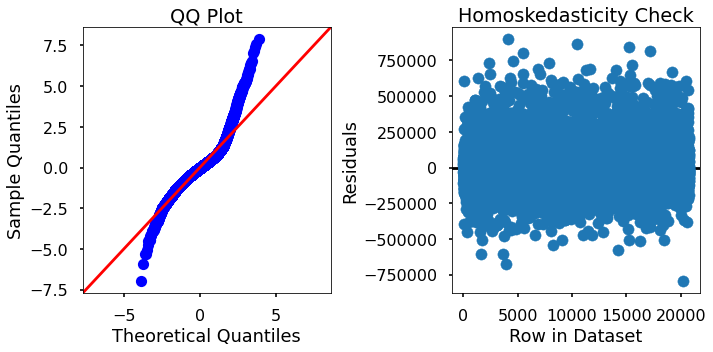

In [56]:
model =  create_model(kings_df, drop_cols=bad_coeffs)
view_model(model,kings_df[target])

# INTERPRET

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

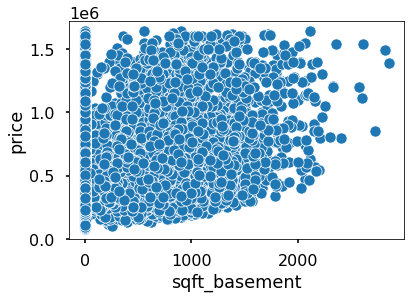

In [57]:
sns.scatterplot(data = kings_df, x='sqft_basement', y='price')

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

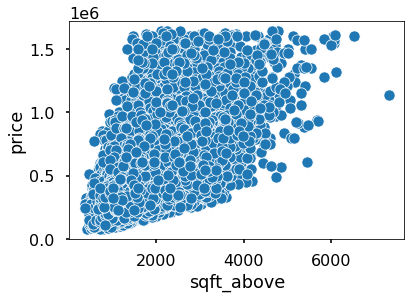

In [58]:
sns.scatterplot(data = kings_df, x='sqft_above', y='price')

### Question 3: Is the condition of a house a predictor in the sale price?

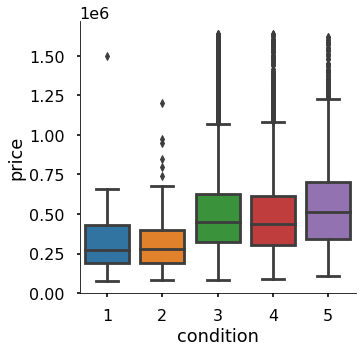

In [59]:
sns.catplot(data=kings_df, x='condition', y='price', kind='box')

# CONCLUSIONS & RECOMMENDATIONS

- People should try to maximize the square footage of their home in order to have a higher chance of getting it to sell for more money
- It may be worthwhile to invest in making the condition better in order to sell it for more